# Examining Fantasy Football Draft Trends
### By Gabe Harris and Jacob Geisberg


## [Our website](https://jberg1999.github.io/Fantasy/)


## Why Fantasy Football?

Fantasy football is a popular game played by millions of people around the world. Contestants draft a team of NFL football players and then are awarded points based on their players' performance each week. While there are opportunities for contestants to improve their teams throughout the season, the draft is by far the biggest factor that contributes to a fantasy team's success. There are a wide array of draft strategies, with no consensus about which one is the best. We are attempting to find the best way to draft a fantasy football team using data science techniques.

We have identified two data sets that will be used to inform our analysis. The first dataset is complete with player statistics, and more importantly, average draft position for the years 2010-2019. This dataset was compilied by [FantasyFootballCalculator.com](https://fantasyfootballcalculator.com/). The second data set contains fantasy statistics for players going back to 1970. This dataset is from [FantasyFootballDataPros.com](https://www.fantasyfootballdatapros.com/). We will use these datasets to compare players' statistical output with their average fantasy draft position. These insights may be used to inform more successful draft strategies.

For example, is it important to draft a running back in the first two rounds? At what round should a contestant draft a quarterback? We plan to go through each position and each round, seeking to maximize the draft value of both. There are six positions in fantasy football; quarterback, two running backs, two wide receivers, and tight end. Most leagues also include defense and kicker although our datasets do not include these positions. We will find out which rounds to target each position. However, it is slightly more complicated than this. For example, if I am picking, but the top five running backs are gone, should I wait until round two to draft a running back? We will filter the data to exclude top players when seeking to answer these questions. At the end, all of these insights will be compiled into a single draft guide. 

## Collaboration Plan

Completing this project will require collaboration and hard work from both team members. We will meet weekly over Zoom to discuss progress and plan work for the next week. We set up a private GitHub repository to enable version control and easy sharing of each other's work. Where necessary, we will work on the project simulataneously using Teletype for Atom. This plan will allow us to work together while still maintaining compliance with social distancing guidelines.

## Data ETL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# This data set contains detailed statistics on each player's fantasy statistsics going
# back to 1970, though only 2010 and beyond are used. Each observation in the final dataframe
# is a player's performance in a given year.

# Load first data frame
df = pd.read_csv("data/yearly/2010.csv", index_col=0)
df["Year"] = "2010"
df["Rank"] = df["FantasyPoints"].rank(ascending=False)
df["PosRank"] = df.groupby("Pos")["Rank"].rank()


path = "data/yearly/2019.csv"

# get data from csv files from 2011 to 2019
for year in range(2011,2020):
    newpath = path.replace("2019", str(year))
    new_df = pd.read_csv(newpath, index_col=0)
    new_df["Year"] = str(year)
    new_df["Rank"] = new_df["FantasyPoints"].rank(ascending=False)
    new_df["PosRank"] = new_df.groupby("Pos")["Rank"].rank()
    df = df.merge(new_df,how="outer")

#create ID
df["ID"] = df["Player"] + " " + df["Year"]
df = df.set_index("ID")

#changing column names and changing team names
df.rename(columns = {'Player':'Name', 'Tm':'Team', 'Pos':'Position'}, inplace = True)
df.loc[df.Team == "KAN", ["Team"]] = "KC"
df.loc[df.Team == "OAK", ["Team"]] = "LV"
df.loc[df.Team == "GNB", ["Team"]] = "GB"
df.loc[df.Team == "NWE", ["Team"]] = "NE"
df.loc[df.Team == "STL", ["Team"]] = "LAR"
df.loc[df.Team == "SDG", ["Team"]] = "LAC"
df.loc[df.Team == "TAM", ["Team"]] = "TB"
df.loc[df.Team == "NOR", ["Team"]] = "NO"
df.loc[df.Team == "SFO", ["Team"]] = "SF"
df

,Name,Team,Position,Age,G,GS,Cmp,Att,Yds,Int,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Year,Rank,PosRank
ID,,,,,,,,,,,,,,,,,,,,,
Arian Foster 2010,Arian Foster,HOU,RB,24.0,16.0,13.0,0.0,0.0,0.0,0.0,...,0.0,1616.0,16.0,327.0,604.0,2.0,392.00,2010,1.0,1.0
Peyton Hillis 2010,Peyton Hillis,CLE,RB,24.0,16.0,14.0,1.0,2.0,13.0,0.0,...,2.0,1177.0,11.0,270.0,477.0,2.0,294.92,2010,7.0,3.0
Adrian Peterson 2010,Adrian Peterson,MIN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,...,0.0,1298.0,12.0,283.0,341.0,1.0,275.90,2010,15.0,6.0
Jamaal Charles 2010,Jamaal Charles,KC,RB,24.0,16.0,6.0,0.0,0.0,0.0,0.0,...,0.0,1467.0,5.0,230.0,468.0,3.0,282.50,2010,10.0,4.0
Chris Johnson 2010,Chris Johnson,TEN,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,1364.0,11.0,316.0,245.0,1.0,272.90,2010,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ray-Ray McCloud 2019,Ray-Ray McCloud,CAR,0,23.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.00,2019,618.5,61.5
Darrius Shepherd 2019,Darrius Shepherd,GB,WR,24.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.90,2019,614.0,216.0
Jarrett Stidham 2019,Jarrett Stidham,NE,QB,23.0,3.0,0.0,2.0,4.0,14.0,1.0,...,4.0,-2.0,0.0,2.0,0.0,0.0,-1.64,2019,617.0,71.0


In [2]:
path2 = "data/adp/2010.csv"
adp = pd.read_csv(path2, index_col=0)
adp["Year"] = "2010"
adp["ID"] = adp["Name"] + " " + adp["Year"]
adp = adp.set_index("ID")

for year in range(2011,2020):
    newpath = path2.replace("2010", str(year))
    new_adp = pd.read_csv(newpath, index_col=0)   
    new_adp["Year"] = str(year)
    new_adp["ID"] = new_adp["Name"] + " " + new_adp["Year"]
    new_adp = new_adp.set_index("ID")
    adp = pd.concat([adp, new_adp])

adp

,Overall,Name,Position,Team,Times Drafted,Std. Dev,High,Low,Bye,Year
ID,,,,,,,,,,
Chris Johnson 2010,1.4,Chris Johnson,RB,TEN,461,0.7,1,6,4,2010
Adrian Peterson 2010,2.1,Adrian Peterson,RB,MIN,286,0.7,1,4,7,2010
Ray Rice 2010,3.0,Ray Rice,RB,BAL,157,0.7,1,5,7,2010
Maurice Jones-Drew 2010,4.4,Maurice Jones-Drew,RB,JAX,355,1.2,1,8,8,2010
Andre Johnson 2010,5.6,Andre Johnson,WR,HOU,315,1.4,2,9,8,2010
...,...,...,...,...,...,...,...,...,...,...
Mohamed Sanu 2019,170.1,Mohamed Sanu,WR,NE,17,10.6,142,180,5,2019
Matt Prater 2019,171.2,Matt Prater,PK,DET,13,5.2,163,178,5,2019
Buffalo Defense 2019,171.8,Buffalo Defense,DEF,BUF,38,9.8,146,191,11,2019


In [3]:
#merge the two dataframes
data = df.merge(adp, on = ['ID', 'Name', 'Position', 'Team', 'Year'], how = 'outer')
data

,Name,Team,Position,Age,G,GS,Cmp,Att,Yds,Int,...,FantasyPoints,Year,Rank,PosRank,Overall,Times Drafted,Std. Dev,High,Low,Bye
ID,,,,,,,,,,,,,,,,,,,,,
Arian Foster 2010,Arian Foster,HOU,RB,24.0,16.0,13.0,0.0,0.0,0.0,0.0,...,392.00,2010,1.0,1.0,36.3,566.0,7.4,17.0,57.0,8
Peyton Hillis 2010,Peyton Hillis,CLE,RB,24.0,16.0,14.0,1.0,2.0,13.0,0.0,...,294.92,2010,7.0,3.0,160.9,40.0,13.5,128.0,179.0,9
Adrian Peterson 2010,Adrian Peterson,MIN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,...,275.90,2010,15.0,6.0,2.1,286.0,0.7,1.0,4.0,7
Jamaal Charles 2010,Jamaal Charles,KC,RB,24.0,16.0,6.0,0.0,0.0,0.0,0.0,...,282.50,2010,10.0,4.0,27.3,298.0,5.7,12.0,41.0,10
Chris Johnson 2010,Chris Johnson,TEN,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,...,272.90,2010,17.0,7.0,1.4,461.0,0.7,1.0,6.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mohamed Sanu 2019,Mohamed Sanu,NE,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019,NaN,NaN,170.1,17.0,10.6,142.0,180.0,5
Matt Prater 2019,Matt Prater,DET,PK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019,NaN,NaN,171.2,13.0,5.2,163.0,178.0,5
Buffalo Defense 2019,Buffalo Defense,BUF,DEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019,NaN,NaN,171.8,38.0,9.8,146.0,191.0,11


## How good are fantasy football contestants at drafting their teams?

In order to justify our research, it is important to first check how well the average fantasy player drafts their teams. If fantasy contestants can draft effectively without the insights generated by data science techniques, then there is no need to perform the analysis. We will examine how closely Average Draft Position (ADP) and fantasy production are correlated.

Correlation coefficient:  -0.4091022498935128


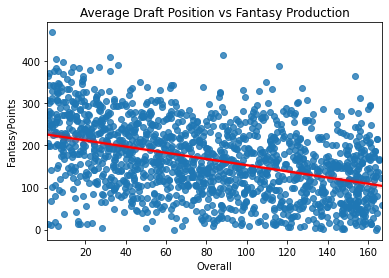

In [4]:
ax = sns.regplot(data['Overall'], data['FantasyPoints'], line_kws={'color':'red'})
ax.set_title("Average Draft Position vs Fantasy Production")

correlation = data['Overall'].corr(data['FantasyPoints'])
print("Correlation coefficient: ", correlation)

As you can see from the above graph, there is a tremendous amount of variance. Players drafted in early rounds may miss time with injury or underperform, while players drafted in later rounds may have breakout years. The correlation coefficient is a measly -0.409. Note that we are expecting a negative correlation coefficient because we expect low ADP players (players who were drafted earlier) to outperform high ADP players (players who were drafted later). While this number does show a correlation, it can absolutely be improved upon. Let's go a little deeper with this analysis.

In [5]:
for i in range(0,16):
    low = 10 * i
    high = low+10
    temp = data[(data.Overall > 10 * i) & (data.Overall > 10 * i +10)]
    
    correlation = temp['Overall'].corr(temp['FantasyPoints'])
    print("Round ", i+1, "correlation coefficient: ", correlation)

Round  1 correlation coefficient:  -0.37345873440939875
Round  2 correlation coefficient:  -0.32522488766476665
Round  3 correlation coefficient:  -0.2923599009834545
Round  4 correlation coefficient:  -0.26111465946652523
Round  5 correlation coefficient:  -0.2378034817365984
Round  6 correlation coefficient:  -0.21037826215452796
Round  7 correlation coefficient:  -0.18120549092331045
Round  8 correlation coefficient:  -0.16837739590725606
Round  9 correlation coefficient:  -0.17124651858532655
Round  10 correlation coefficient:  -0.18083275888974845
Round  11 correlation coefficient:  -0.14054298936802287
Round  12 correlation coefficient:  -0.08534819613451754
Round  13 correlation coefficient:  0.03552463654305286
Round  14 correlation coefficient:  0.018297062713047263
Round  15 correlation coefficient:  0.0377254625326922
Round  16 correlation coefficient:  -0.20013534528794819


Notice that as a draft progresses to later rounds, the correlation gets weaker. This makes logical sense. In the early rounds of a draft, star players and consistent performers are taken. Drafting a team becomes much more difficult in the later rounds, when these players are no longer available. Contestants may have to take a chance on an unproven rookie, or a previously inconsistent player. This means that the most important factor in drafting a good team is finding productive players in later rounds. This is where we will focus our analysis. 

## Why analyze by position?

If you are plenty familiar with why we need to break down fantasy player value by position, feel free to skip this part and head straight to the analysis!

Suppose we play a simplified version of fantasy football in which each team consists of 9 players regardless of what position they play.  As in normal fantasy football, the season is split into 17 weeks, and the goal of each week is to outscore the opponent you are playing that week. A typical matchup would look like this:

|        |  Team 1  |        |        |  Team 2   |        |
|:------:|:--------:|:------:|:------:|:---------:|:------:|
| Slot   | Player   | Points | Points | Player    | Slot   |
| Slot 1 | Player 1 | 24     | 33     | Player 10 | Slot 1 |
| Slot 2 | Player 2 | 11     | 9      | Player 11 | Slot 2 |
| Slot 3 | Player 3 | 9      | 2      | Player 12 | Slot 3 |
| Slot 4 | Player 4 | 18     | 5      | Player 13 | Slot 4 |
| Slot 5 | Player 5 | 0      | 15     | Player 14 | Slot 5 |
| Slot 6 | Player 6 | 14     | 0      | Player 15 | Slot 6 |
| Slot 7 | Player 7 | 15     | 28     | Player 16 | Slot 7 |
| Slot 8 | Player 8 | 11     | 16     | Player 17 | Slot 8 |
| Slot 9 | Player 9 | 20     | 11     | Player 18 | Slot 9 |
|        | Total    | 122    | 119    | Total     |        |


In this example determining any player’s value is easy because it is directly determined by how many points he scored that week. That means that if you could select any 9 players to be on your fantasy team you would select the 9 players expected to score the most on average thereby giving you the highest chance of winning any given week. Nearly every league has some sort of structure, usually a snake draft, before the season to allow teams to take turns selecting players and to avoid duplicates. Under these set of circumstances, the best draft pick one could make would always be the player who is projected to score the most fantasy points of any remaining player. Lets have a quick look at what kinds of players should be targeted in this simplified league by taking the tops scorers over the last ten years:


,Position,FantasyPoints
ID,,
Christian McCaffrey 2019,RB,469.20
Lamar Jackson 2019,QB,415.68
Patrick Mahomes 2018,QB,415.08
Peyton Manning 2013,QB,409.98
David Johnson 2016,RB,405.80
Aaron Rodgers 2011,QB,397.42
Arian Foster 2010,RB,392.00
Cam Newton 2015,QB,389.08
Drew Brees 2011,QB,387.64


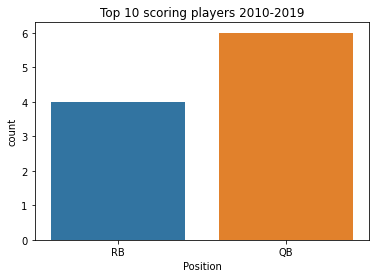

In [6]:
top_10 = data.sort_values(by="FantasyPoints", ascending = False).head(10)
display(top_10[["Position","FantasyPoints"]])
sns.countplot(data=top_10, x= "Position")
plt.title("Top 10 scoring players 2010-2019")
plt.show()

Surprise! Almost all of the top fantasy producers are quarterbacks or runningbacks! This means that all we have to do is draft quarterbacks at first and then move to runningbacks and down the line right? Well, that is an excellent strategy for a positionless league, but since that structure is pretty mundane and lacking in difficulty, most leagues spice things up but placing positional restrictions on your line up. A common matchup might look something like this:

|                |  Team 1  |             |             |   Team 2  |                |
|:--------------:|:--------:|:-----------:|:-----------:|:---------:|:--------------:|
| Position       | Player   | Points      | Points      | Player    | Position       |
| QB             | Player 1 | 24          | 33          | Player 10 | QB             |
| RB1            | Player 2 | 18          | 14          | Player 11 | RB1            |
| RB2            | Player 3 | 13          | 11          | Player 12 | RB2            |
| WR1            | Player 4 | 18          | 5           | Player 13 | WR1            |
| WR2            | Player 5 | 0           | 21          | Player 14 | WR2            |
| TE             | Player 6 | 7           | 10          | Player 15 | TE             |
| FLEX(RB,WR,TE) | Player 7 | 15          | 12          | Player 16 | FLEX(RB,WR,TE) |
| D/ST           | Player 8 | 8           | 3           | Player 17 | D/ST           |
| K              | Player 9 | 10          | 10          | Player 18 | K              |
|                | Bench    |             |             | Bench     |                |
|    |           |          |             |             |           |           |
| Any            | Bench 1  | Not Counted | Not Counted | Bench 7   | Any            |
| Any            | Bench 2  | Not Counted | Not Counted | Bench 8   | Any            |
| Any            | Bench 3  | Not Counted | Not Counted | Bench 9   | Any            |
| Any            | Bench 4  | Not Counted | Not Counted | Bench 10  | Any            |
| Any            | Bench 5  | Not Counted | Not Counted | Bench 11  | Any            |
| Any            | Bench 6  | Not Counted | Not Counted | Bench 12  | Any            |





As you can see, our strategy of drafting all quarterbacks and runningbacks will no longer work here because we would not even be able to  field a complete team! This means that instead of only focusing on getting the highest scoring players, we need to make sure our team has good performers at each position in the lineup if we want to be successful. The tricky part is that as we have hinted at in our previous graph is that what a good performer looks like can be different for different positions. Here is the average points per week for all players who play QB, RB, WR, and TE. We do not have data for defenses and kickers so we omit them.


In [7]:
averages = data.groupby("Position").FantasyPoints.mean() / 17
print(averages[["QB",'RB','WR','TE']])

Position
QB    6.593466
RB    4.324490
WR    5.106244
TE    3.374470
Name: FantasyPoints, dtype: float64


There is still a problem here! These point values are really low. Surely the average QB scores more than 6.5 points per week, and this data makes it seem like wide recievers score more points than runningbacks! To help resolve this problem, let's look more carefully at the distribution of players at each position.

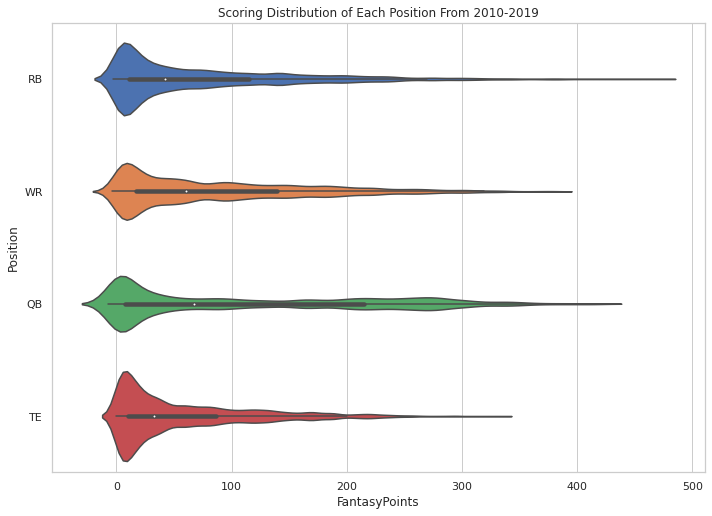

<Figure size 720x720 with 0 Axes>

In [8]:
d = data.loc[data["Position"].isin(["QB",'RB','WR','TE'])]

sns.set(rc={'figure.figsize':(11.7,8.27)})
'''with sns.axes_style("whitegrid"):
    sns.violinplot(data=d, x="Position", y="FantasyPoints", inner="box",
                  saturation=0.7, bw=.1)'''
    


#sns.set(rc={'figure.figsize':(10,10)})
with sns.axes_style("whitegrid"):
    sns.violinplot(data=d, y="Position", x="FantasyPoints", inner="box",
                  saturation=1, bw=.1)
    plt.title("Scoring Distribution of Each Position From 2010-2019")
    plt.figure(figsize=(10,10))
    


As you can clearly see, the averages are being heavily affected by the majority of players who hardly score at all! As those familiar with fantasy football know, virtually every fantasy player is capable of drafting better than blindly picking players at random, and those who lack knowledge will use auto-drafting mechanisms provided by the hosting website. As a result, we are going to need to adjust our value to better compare players against those whom we are likely to face in actual competition.

To prove just how good owners are at extracting the most valuable players, we will examine how many of the top scoring players each week and throughout a season are owned. In a perfectly managed fantasy league, all of the top performers over weekly and yearly time spans would be owned and started, meaning that if there are 12 teams in a league, a perfect league would have each of the top 12 QBs would be owned and started. Since there are at least 2 WRs starting on each team, we should expect that the top 12 * 2 = 24 WRs are owned. While we do not have data on waverwire transactions or weekly roster decisions, we can still use draft data to determine if owers are sufficently good at finding valuable players during the draft. Here is a breakdown of the success of fantsy owners at aquiring starting level talent. 

,Year,Position,Drafted
0,2010,QB,10
1,2010,RB,20
2,2010,TE,9
3,2010,WR,22
4,2011,QB,11


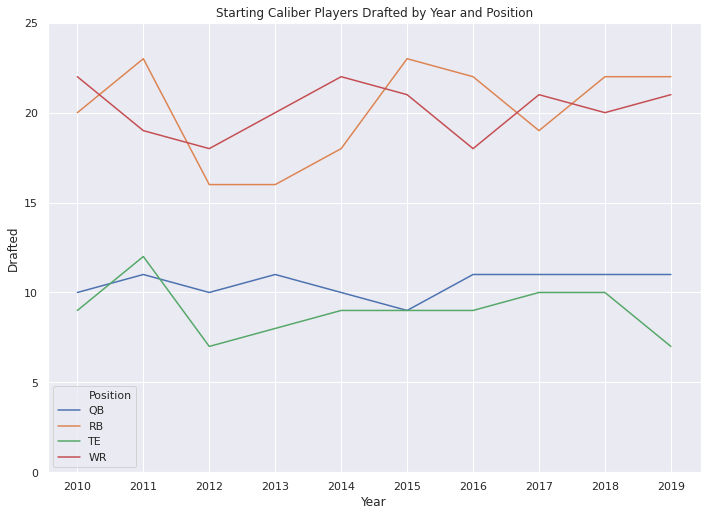

Here is the average number of starters drafted by postion:
Position
QB    10.5
RB    20.1
TE     9.0
WR    20.2
Name: Drafted, dtype: float64


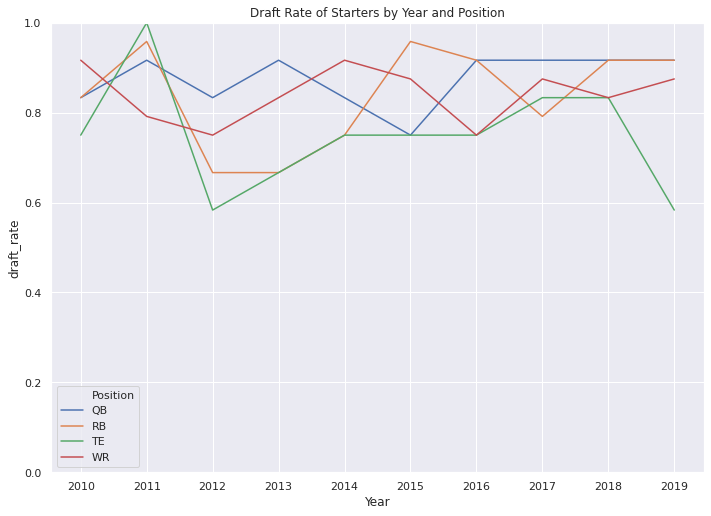

Here is the average proportion of starters drafted by postion:
Position
QB    0.875000
RB    0.837500
TE    0.750000
WR    0.841667
Name: draft_rate, dtype: float64
average starter draft rate 0.8260416666666666


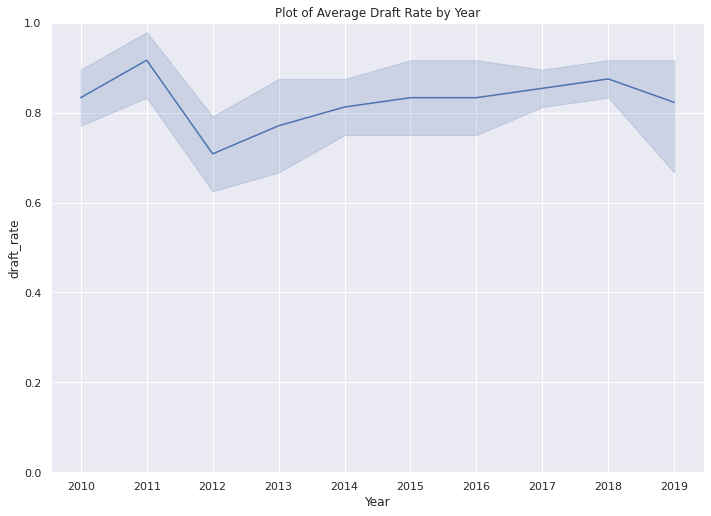

Here is a breakdown of draft rate by year
Year
2010    0.833333
2011    0.916667
2012    0.708333
2013    0.770833
2014    0.812500
2015    0.833333
2016    0.833333
2017    0.854167
2018    0.875000
2019    0.822917
Name: draft_rate, dtype: float64


In [9]:
N = 12 # 12 team league

# creates a value for if players have been drafted according to ADP data
data["Drafted"] = data.Overall >= 0

#Gets players who are top 12 at their position in a year or are top 24 if RB or WR.
starter = data.loc[(data.PosRank <= N) & (data.Position.isin(["QB","TE"]))| 
                   ((data.PosRank <= 2*N) & (data.Position.isin(["RB","WR"])))]


'''creates a new data frame with information about how many starting caliber players 
were drafted in a given year at each position'''
starter = pd.DataFrame(starter.groupby(["Year","Position"]).Drafted.sum())
starter = starter.reset_index()
display(starter.head())

#plot of how many starters have been drafted
sns.lineplot(data=starter, x='Year', y='Drafted', hue='Position')
plt.title("Starting Caliber Players Drafted by Year and Position")
plt.ylim(0,25)
plt.show()

#summary of plot
print("Here is the average number of starters drafted by postion:")
print(starter.groupby("Position").Drafted.mean())

#calculates the rate at which starters are drafted by dividing by the total number of starters
starter["draft_rate"] = starter.apply(lambda row: row.Drafted / N if row.Position in ["QB","TE"] 
                                       else row.Drafted / (2 *N), axis=1)

#plot of draft rate by postion
sns.lineplot(data=starter, x='Year', y='draft_rate', hue='Position')
plt.title("Draft Rate of Starters by Year and Position")
plt.ylim(0,1)
plt.show()

#summary of plot
print("Here is the average proportion of starters drafted by postion:")
print(starter.groupby("Position").draft_rate.mean())
print("average starter draft rate", starter.groupby("Position").draft_rate.mean().mean())

#plot of average draft rate by year
sns.lineplot(data=starter, x='Year', y='draft_rate')
plt.title('Plot of Average Draft Rate by Year')
plt.ylim(0,1)
plt.show()

print("Here is a breakdown of draft rate by year")
print(starter.groupby("Year").draft_rate.mean())


Position
QB    10.5
RB    20.1
TE     9.0
WR    20.2
Name: Drafted, dtype: float64


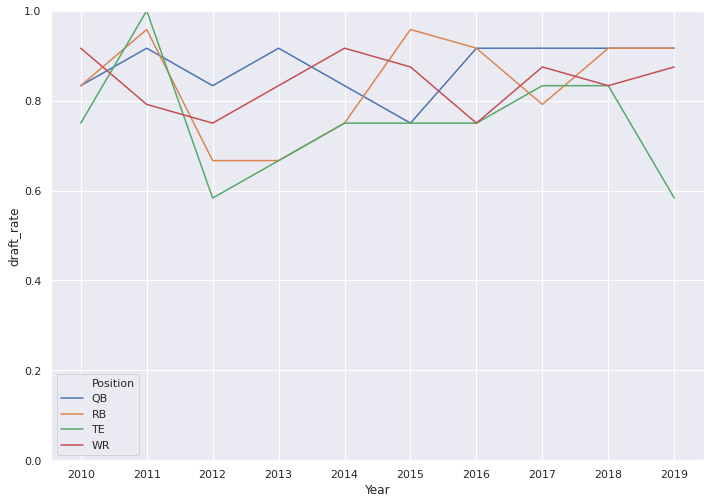

Position
QB    0.875000
RB    0.837500
TE    0.750000
WR    0.841667
Name: draft_rate, dtype: float64
average starter draft rate 0.8260416666666666


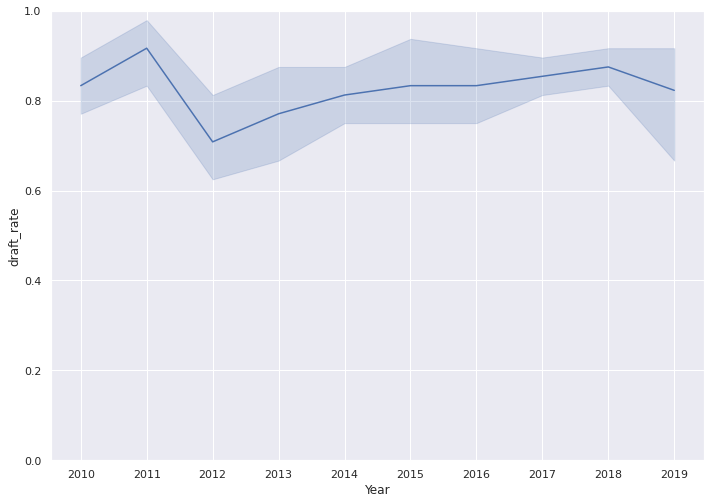

Year
2010    0.833333
2011    0.916667
2012    0.708333
2013    0.770833
2014    0.812500
2015    0.833333
2016    0.833333
2017    0.854167
2018    0.875000
2019    0.822917
Name: draft_rate, dtype: float64


In [10]:
print(starter.groupby("Position").Drafted.mean())
starter["draft_rate"] = starter.apply(lambda row: row.Drafted / N if row.Position in ["QB","TE"] 
                                       else row.Drafted / (2 *N), axis=1)

sns.lineplot(data=starter, x='Year', y='draft_rate', hue='Position')
plt.ylim(0,1)
plt.show()
print(starter.groupby("Position").draft_rate.mean())
print("average starter draft rate", starter.groupby("Position").draft_rate.mean().mean())

sns.lineplot(data=starter, x='Year', y='draft_rate')
plt.ylim(0,1)
plt.show()
print(starter.groupby("Year").draft_rate.mean())

As you can see here, the positions with one starter, QB and TE are pretty close to the upper limit of 12 and the WR and RB are pretty close to 24. This means that even though football seasons are full of unforseeable circumstances such as injuries, almost all of the best players are taken during the draft. This is true for all the postions above as well as each year in the sample of 2010-2019.

Becuase we have shown that players are able to evaluate and aquire the top talent at each position, we can safely adjust our definition of player value to compare each player to the best amoung his peers. Specifically we can use the distance between a player and the expected value, of each of the starters at his position. This expected value is a measure of central tendency and can be calculated in two ways. The two methods are average and median. We plan on using both to see which is better, although we suspect that median will be more effective due to its resistance to outliers. As an example, a QB's value in a given week might be +5 if they outperform the average of the top 12 QB performances from that week by 5 points in a 12 team league. Becuase we are building a drafting model that is acting on predicted value for all of its players and becuase we are drafting players for a whole year, our value function is the expected points of a player - the expected value of points for the starters at that position. We divide this number by 16, the number of games each team plays in the NFL season to make it more interpretable.



In [11]:
data['projStarter'] = [True]*6551
onlyQbs = data[data["Position"] == 'QB']

#years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
for row in onlyQbs.head().index:
    newIdx = row[:-4] + str(int(row[-4:]) + 1)
    if newIdx in onlyQbs.index and onlyQbs.loc[row].Position == 'QB':
        for row2 in onlyQbs[(onlyQbs['Team'] == onlyQbs.loc[newIdx]['Team']) & (onlyQbs['Year'] == newIdx[-4:])].index:
            if onlyQbs.loc[row, 'FantasyPoints'] < onlyQbs.loc[row2, 'FantasyPoints']:
                onlyQbs.loc[row, 'projStarter'] = False
                print("here")
    
    #print(newIdx)
    #print(data.loc[row].Year)
onlyQbs[(onlyQbs['Team'] == 'PHI') & (onlyQbs['Year'] == '2011')]

here
here


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Name,Team,Position,Age,G,GS,Cmp,Att,Yds,Int,...,Rank,PosRank,Overall,Times Drafted,Std. Dev,High,Low,Bye,Drafted,projStarter
ID,,,,,,,,,,,,,,,,,,,,,
Michael Vick 2011,Michael Vick,PHI,QB,31.0,13.0,13.0,253.0,423.0,3303.0,14.0,...,32.0,11.0,5.5,73.0,2.5,1.0,18.0,9,True,True
Vince Young 2011,Vince Young,PHI,QB,28.0,6.0,3.0,66.0,114.0,866.0,9.0,...,291.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
Mike Kafka 2011,Mike Kafka,PHI,QB,24.0,4.0,0.0,11.0,16.0,107.0,2.0,...,523.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [12]:
nextlist = []
for row in data.index:
    newIdx = row[:-4] + str(int(row[-4:]) + 1)
    if newIdx in data.index:
        nextpts = data.loc[newIdx, 'FantasyPoints']
        if isinstance(nextpts, float):
            nextlist.append(nextpts)
        else:
            nextlist.append(np.nansum(nextpts))
    else:
        nextlist.append(0)
data['nextYrPts'] = nextlist
data[data['Position'] == 'QB']

,Name,Team,Position,Age,G,GS,Cmp,Att,Yds,Int,...,PosRank,Overall,Times Drafted,Std. Dev,High,Low,Bye,Drafted,projStarter,nextYrPts
ID,,,,,,,,,,,,,,,,,,,,,
Michael Vick 2010,Michael Vick,PHI,QB,30.0,12.0,12.0,233.0,372.0,3018.0,6.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True,233.02
Aaron Rodgers 2010,Aaron Rodgers,GB,QB,27.0,15.0,15.0,312.0,475.0,3922.0,11.0,...,2.0,6.8,327.0,2.3,1.0,15.0,5,True,True,397.42
Tom Brady 2010,Tom Brady,NE,QB,33.0,16.0,16.0,324.0,492.0,3900.0,4.0,...,3.0,25.2,476.0,5.5,10.0,41.0,5,True,True,366.30
Philip Rivers 2010,Philip Rivers,LAC,QB,29.0,16.0,16.0,357.0,541.0,4710.0,13.0,...,5.0,42.0,326.0,7.0,23.0,60.0,6,True,True,252.56
Peyton Manning 2010,Peyton Manning,IND,QB,34.0,16.0,16.0,450.0,679.0,4700.0,17.0,...,4.0,17.7,463.0,4.3,6.0,27.0,7,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andrew Luck 2017,Andrew Luck,IND,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.6,227.0,9.0,73.0,114.0,7,True,True,323.92
Pat Mahomes 2018,Pat Mahomes,KC,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,115.8,496.0,10.0,89.0,142.0,10,True,True,NaN
Mitch Trubisky 2018,Mitch Trubisky,CHI,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,159.2,86.0,14.2,122.0,186.0,11,True,True,NaN


In [13]:
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

### Quarterbacks

In [14]:
#for quarterbacks
onlyQbs = data[(data["Position"] == 'QB') & (data["Year"] != '2019') 
               & (data["Year"] != '2018') & (data["Year"] != '2017') & (data["Year"] != '2016')]
onlyQbs = onlyQbs.fillna(0)

qbFeatures = ['Age', 'GS', 'Cmp', 'PassingAtt', 'Int', 'RushingAtt', 'RushingYds', 'RushingTD',
             'PassingYds', 'PassingTD']


X_train_dict = onlyQbs[qbFeatures].to_dict(orient="records")
y_train = onlyQbs["nextYrPts"]

# Dummy encoding
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Nearest Neighbors Regression
model = KNeighborsRegressor(n_neighbors=35, weights = 'distance')
model.fit(X_train_sc, y_train)

KNeighborsRegressor(n_neighbors=35, weights='distance')

In [15]:
predictions = []
vec = DictVectorizer(sparse=False)
scaler.fit(X_train)
vec.fit(X_train_dict)

onlyQbsTest = data[(data["Position"] == 'QB') & ((data["Year"] == '2016') | (data["Year"] == '2017') 
                                                | (data["Year"] == '2018'))]
onlyQbsTest = onlyQbsTest.fillna(0)

for row in onlyQbsTest.index:
    X_new_list = []
    
    if isinstance(onlyQbsTest.loc[row].Age, float):
        
        X_new_dict = onlyQbsTest.loc[row, qbFeatures].to_dict()
        
    else:
        temp = onlyQbsTest.loc[row, qbFeatures]
        X_new_dict = {}
        for feature in qbFeatures:
            X_new_dict[feature] = np.nansum(temp[feature])
    
    X_new = vec.transform(X_new_dict)
    X_new_sc = scaler.transform(X_new)
    predictions.append(model.predict(X_new_sc)[0])

print(r2_score(onlyQbsTest['nextYrPts'], predictions))
onlyQbsTest['projScore'] = predictions

0.47232421516871204


### Running Backs

In [16]:
#for running backs
onlyRbs = data[(data["Position"] == 'RB') & (data["Year"] != "2019")
              & (data["Year"] != '2018') & (data["Year"] != '2017') & (data["Year"] != '2016')]
onlyRbs = onlyRbs.fillna(0)

rbFeatures = ['Age', 'GS','RushingAtt', 'RushingYds', 'RushingTD',
             'Tgt', 'Rec', 'ReceivingYds', 'ReceivingTD']

X_train_dict = onlyRbs[rbFeatures].to_dict(orient="records")
y_train = onlyRbs["nextYrPts"]

# Dummy encoding
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Ridge Regression
model = linear_model.Ridge(alpha=0.001)
model.fit(X_train_sc, y_train)

Ridge(alpha=0.001)

In [17]:
predictions = []
vec = DictVectorizer(sparse=False)
scaler.fit(X_train)
vec.fit(X_train_dict)

onlyRbsTest = data[(data["Position"] == 'RB') & ((data["Year"] == '2016') | (data["Year"] == '2017') 
                                                | (data["Year"] == '2018'))]
onlyRbsTest = onlyRbsTest.fillna(0)

for row in onlyRbsTest.index:
    X_new_list = []
    
    if isinstance(onlyRbsTest.loc[row].Age, float):
        
        X_new_dict = onlyRbsTest.loc[row, rbFeatures].to_dict()
        
    else:
        temp = onlyRbsTest.loc[row, rbFeatures]
        X_new_dict = {}
        for feature in rbFeatures:
            X_new_dict[feature] = np.nansum(temp[feature])
    
    X_new = vec.transform(X_new_dict)
    X_new_sc = scaler.transform(X_new)
    predictions.append(model.predict(X_new_sc)[0])

print(r2_score(onlyRbsTest['nextYrPts'], predictions))
onlyRbsTest['projScore'] = predictions

0.4658281635739452


### Pass Catchers (Wide Receivers and Tight Ends)

In [18]:
#for pass catchers
onlyWRsTEs = data[((data["Position"] == 'WR') | (data["Position"] == 'TE')) & (data["Year"] != "2019")
                  & (data["Year"] != '2018') & (data["Year"] != '2017') & (data["Year"] != '2016')]
onlyWRsTEs = onlyWRsTEs.fillna(0)

wrteFeatures = ['Age', 'GS','Tgt', 'Rec', 'ReceivingYds', 'ReceivingTD']

X_train_dict = onlyWRsTEs[wrteFeatures].to_dict(orient="records")
y_train = onlyWRsTEs["nextYrPts"]

# Dummy encoding
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Ridge Regression
model = linear_model.Ridge(alpha=0.001)
model.fit(X_train_sc, y_train)

Ridge(alpha=0.001)

In [19]:
predictions = []
vec = DictVectorizer(sparse=False)
scaler.fit(X_train)
vec.fit(X_train_dict)

onlyWRsTEsTest = data[((data["Position"] == 'WR') | (data["Position"] == 'TE')) & 
                      ((data["Year"] == '2016') | (data["Year"] == '2017') | (data["Year"] == '2018'))]
onlyWRsTEsTest = onlyWRsTEsTest.fillna(0)

for row in onlyWRsTEsTest.index:
    X_new_list = []
    
    if isinstance(onlyWRsTEsTest.loc[row].Age, float):
        
        X_new_dict = onlyWRsTEsTest.loc[row, wrteFeatures].to_dict()
        
    else:
        temp = onlyWRsTEsTest.loc[row, wrteFeatures]
        X_new_dict = {}
        for feature in wrteFeatures:
            X_new_dict[feature] = np.nansum(temp[feature])
    
    X_new = vec.transform(X_new_dict)
    X_new_sc = scaler.transform(X_new)
    predictions.append(model.predict(X_new_sc)[0])

print(r2_score(onlyWRsTEsTest['nextYrPts'], predictions))
onlyWRsTEsTest['projScore'] = predictions

0.5136918284816725


In [20]:
projData = pd.concat([onlyQbsTest, onlyRbsTest, onlyWRsTEsTest])
projData

,Name,Team,Position,Age,G,GS,Cmp,Att,Yds,Int,...,Overall,Times Drafted,Std. Dev,High,Low,Bye,Drafted,projStarter,nextYrPts,projScore
ID,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers 2016,Aaron Rodgers,GB,QB,33.0,16.0,16.0,401.0,610.0,4428.0,7.0,...,32.3,159.0,7.2,13.0,46.0,5,True,True,129.60,248.630770
Matt Ryan 2016,Matt Ryan,ATL,QB,31.0,16.0,16.0,373.0,534.0,4944.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0,False,True,228.10,250.838522
Drew Brees 2016,Drew Brees,NO,QB,37.0,16.0,16.0,471.0,673.0,5208.0,15.0,...,57.2,123.0,5.9,41.0,71.0,6,True,True,262.56,267.026101
Andrew Luck 2016,Andrew Luck,IND,QB,27.0,15.0,15.0,346.0,545.0,4240.0,13.0,...,54.8,147.0,6.0,39.0,68.0,7,True,True,0.00,234.098533
Kirk Cousins 2016,Kirk Cousins,WAS,QB,28.0,16.0,16.0,406.0,606.0,4917.0,12.0,...,110.4,133.0,9.8,84.0,130.0,8,True,True,277.62,239.176328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Demaryius Thomas 2018,Demaryius Thomas,HOU,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.2,554.0,4.9,39.0,74.0,8,True,True,85.30,109.995000
Golden Tate 2018,Golden Tate,PHI,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,580.0,6.1,51.0,86.0,9,True,True,152.20,134.998293
Kelvin Benjamin 2018,Kelvin Benjamin,KC,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,104.4,282.0,8.7,81.0,124.0,10,True,True,0.00,57.177245


In [21]:
#display(adp[adp.Name =="Dalvin Cook"])

path = "data/weekly/2010/week1.csv"
df = pd.read_csv(path)
df["Year"] = "2010"
df["Week"] = '1'
df = df.loc[df.Week == 1]
# get data from csv files from 2011 to 2019
for year in range(2010,2020):
    
    #newpath = path.replace("2019", str(year))
    for week in range(1,18):
        newpath = path.replace("2010", str(year))
        newpath = newpath.replace("week1", "week"+ str(week))
        print(newpath)
        new_df = pd.read_csv(newpath)
        new_df["Year"] = str(year)
        new_df["Week"] = str(week)
        #display(new_df)
        df = df.merge(new_df,how="outer")

#create ID
df["ID"] = df["Player"] + " " + df["Year"] + ' ' + df["Week"]
weekly = df.set_index("ID")
display(weekly)


data/weekly/2010/week1.csv
data/weekly/2010/week2.csv
data/weekly/2010/week3.csv
data/weekly/2010/week4.csv
data/weekly/2010/week5.csv
data/weekly/2010/week6.csv
data/weekly/2010/week7.csv
data/weekly/2010/week8.csv
data/weekly/2010/week9.csv
data/weekly/2010/week10.csv
data/weekly/2010/week11.csv
data/weekly/2010/week12.csv
data/weekly/2010/week13.csv
data/weekly/2010/week14.csv
data/weekly/2010/week15.csv
data/weekly/2010/week16.csv
data/weekly/2010/week17.csv
data/weekly/2011/week1.csv
data/weekly/2011/week2.csv
data/weekly/2011/week3.csv
data/weekly/2011/week4.csv
data/weekly/2011/week5.csv
data/weekly/2011/week6.csv
data/weekly/2011/week7.csv
data/weekly/2011/week8.csv
data/weekly/2011/week9.csv
data/weekly/2011/week10.csv
data/weekly/2011/week11.csv
data/weekly/2011/week12.csv
data/weekly/2011/week13.csv
data/weekly/2011/week14.csv
data/weekly/2011/week15.csv
data/weekly/2011/week16.csv
data/weekly/2011/week17.csv
data/weekly/2012/week1.csv
data/weekly/2012/week2.csv
data/weekly/

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,...,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Year,Week
ID,,,,,,,,,,,,,,,,,,,,,
Vince Young 2010 1,Vince Young,QB,TEN,154.0,2.0,0.0,17.0,13.0,7.0,30.0,...,0.0,0.0,0.0,0.0,1.0,15.16,15.16,15.16,2010,1
David Garrard 2010 1,David Garrard,QB,JAX,170.0,3.0,0.0,21.0,16.0,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0,19.80,19.80,19.80,2010,1
Tom Brady 2010 1,Tom Brady,QB,NWE,258.0,3.0,0.0,35.0,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.32,22.32,22.32,2010,1
Peyton Manning 2010 1,Peyton Manning,QB,IND,433.0,3.0,0.0,57.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29.32,29.32,29.32,2010,1
Jay Cutler 2010 1,Jay Cutler,QB,CHI,372.0,2.0,1.0,35.0,23.0,5.0,22.0,...,0.0,0.0,0.0,0.0,1.0,21.08,21.08,21.08,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tavon Austin 2019 17,Tavon Austin,WR,DAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,1.10,0.10,0.60,2019,17
Blake Bell 2019 17,Blake Bell,TE,KAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,1.10,0.10,0.60,2019,17
Jamal Agnew 2019 17,Jamal Agnew,CB,DET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,-2.0,0.0,0.0,0.80,-0.20,0.30,2019,17


In [22]:
import copy
class Team:
    def __init__(self, positions,roster_caps,name):
        self.name = name
        self.pos_counts = self.set_pos_counts(positions)
        self.roster = self.set_roster(positions)
        self.starter_cap = positions
        self.picks = []
        self.selected = []
        self.roster_caps = roster_caps
        self.wins = 0
        
    
    def set_pos_counts(self, positions):
        p = positions.copy()
        for k in p.keys():
            #if k not in ["FLX","BEN"] :
                #p[k] = 0
            p[k] = 0
        return p
    
    def set_roster(self, positions):
        p = positions.copy()
        for k in p.keys():
            p[k] = []
        return p
    
    def add_pick(self, pick):
        self.picks.append(pick)
    
    def add_wins(self, n):
        self.wins += n
    
    def draft_player(self, board):
        
        # MAKES SURE STARTERS ARE FILLED AT END
        starter_num = sum(self.starter_cap.values()) - self.starter_cap["BEN"]
        #starters_filled = sum(self.pos_counts.values()) - self.pos_counts["BEN"]
        starters_filled = sum([len(x) for x in self.roster.values()])- len(self.roster["BEN"])
        open_slots = starter_num - starters_filled
        #print("starter num",starter_num)
        #print("starters filled",starters_filled)
        #print("open slots", open_slots)
        
        # RESTRICT POSITIONS TO FILL STARTING LINEUP OF NEEDED
        if open_slots >= len(self.picks): # MUST DRAFT TO FILL LINEUP
            #print("flagged")
            #print("picks left", len(self.picks))
            must_draft = [pos for pos in ["QB","RB","WR","TE"] if self.starter_cap[pos] > len(self.roster[pos])]
            #print("Must draft:", must_draft)
            #print(self.roster)
            new_board = board.loc[board["Position"].isin(must_draft)]
        
        else:    

            #PREVENTS OVERLOADING ON A POSITION IF STARTERS ARE ALL FILLED
            #print(self.pos_counts)
            #print(self.roster_caps)
            capped = [pos for pos in ["QB","RB","WR","TE"] if self.pos_counts[pos] >= self.roster_caps[pos]]
            #print("capped", capped)
            draftable = [pos for pos in self.pos_counts.keys() if pos not in capped]
            new_board = board.loc[board["Position"].isin(draftable)]
       
        #BEST PLAYER FROM AVAILABLE
        best = new_board.Overall.idxmin() 
        position = new_board.loc[best].Position
        #print("position:", position)
        
        # HANDELS BROKEN DATAFRAME
        if type(position) != str:
            position = position[0]
            #print(position)
            #print("changed teams!!")
        
        #UPDATES THE POSITION COUNTS AND ROSTER
        self.pos_counts[position] += 1
        if len(self.roster[position]) < self.starter_cap[position]:
            self.roster[position].append(best)
        elif (len(self.roster["FLX"]) < self.starter_cap["FLX"]) and (position in ["RB","WR","TE"]):
            self.roster["FLX"].append(best)
        
        else:
            self.roster["BEN"].append(best)
        
        #UPDATES THE REMAING PICKS AND PLAYERS CHOSEN
        self.selected.append((self.picks[0], board.loc[best].Name))
        self.picks = self.picks[1:]
        
        return best
    
    #RETURNS THE POINTS OF THE OPTIMAL LINEUP FOR A WEEK
    def set_lineup(self,data,scoring):
        #print("data")
        #display(data.head(5))
        #print("team!")
        #print(self.selected)
        players = [x[1] for x in self.selected]
        #print("player names")
        #print(players)
        #print(data["Player"])
        players = data.loc[data["Player"].isin(players)]
        #print("displaying players now")
        #display(players)
        players = players.set_index("Player")
        players["Pos"]= players.apply(lambda row: "RB" if row.Pos in ["FB","HB", "RB/K", "FB/R","RB/F", "FB/T"] 
                                      else row.Pos, axis = 1)
        total_points = 0
        for pos in ["QB","RB", "WR","TE",]:
            cap = self.starter_cap[pos]
            if scoring == "standard":
                best = players.loc[players["Pos"] == pos].StandardFantasyPoints.nlargest(cap)
            #print("best", best)
            total_points += best.sum()
            players = players.drop(best.index)
        #display(players)
        players = players.loc[players["Pos"].isin(["RB", "WR","TE"])]        
        if scoring == "standard":
            total_points += sum(players.StandardFantasyPoints.nlargest(self.starter_cap["FLX"]))
        
        #print("total",total_points)
        return total_points
    

positions = {
    "QB": 1,
    "RB": 2,
    "WR": 2,
    "TE": 1,
    "FLX": 1,
    "BEN": 6
}

roster_caps = {
    "QB": 4,
    "RB": 8,
    "WR": 8,
    "TE": 3,  
}
#print(positions)
#print(sum(positions.values()))


#print(data.columns)
display(pd.read_csv("data/weekly/2019/week1.csv"))


,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Jakeem Grant,WR,MIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,-3.0,0.0,1.0,-1.30,-2.30,-1.80
292,Quincy Enunwa,WR,NYJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-4.0,0.0,1.0,-1.40,-2.40,-1.90
293,Maurkice Pouncey,C,PIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
294,Jamal Agnew,CB,DET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.00,-2.00,-2.00


In [23]:
class Perfect(Team):
    
    
    
    def draft_player(self, board): 
        # remove players likely to not be available
        
        #CANT LOOK AHAED IF WE ARE IN THE LAST ROUND!
        if len(self.picks) > 1:
            pick_gap = (self.picks[1]- self.picks[0])-1 
            #print(self.picks[1], "-", self.picks[0])
            #print(pick_gap)
            #print("projected draft losses")
            #print(board.Overall.nsmallest(pick_gap))
            #print("index")
            #print(board.drop(board.Overall.nsmallest(pick_gap).index))
            
            #BOOKENDS SHOULD CONSIDER NEXT TIME THEY HAVE TO DRAFT NOT THE IMMEDAITE NEXT PICK
            if pick_gap == 0:
                # THIS ONLY WORKS IF THERE IS ANOTHER PICK AFTER THE CONSECUTIVE ONES
                if len(self.picks) >3:
                    next_pick = self.picks[2]
                    effective_gap = (next_pick - self.picks[1]) - 1
                    next_board = board.drop(board.Overall.nsmallest(effective_gap).index)
                else:
                    next_board = board.copy()
                
            else:
                next_board = board.drop(board.Overall.nsmallest(pick_gap).index)
            
            #print()
            #print("highest 3 remaining")
            #display(next_board.Overall.sort_values().head(3))
            #display(next_board.Overall.head(3))
        
        else:
            next_board = board.copy()
            
        #BEST FOR EACH POSITION CURRENTLY AVIABLABLE
        groups_1 = board.groupby("Position")
        options = {}
        diffs = {}
        for name, group in groups_1:
            best = group.FantasyPoints.nlargest(1)
            diffs[name] = best[0]
            options[name] = best.idxmax()
        #print(diffs)    
        
        # PROJECTED BEST FOR EACH POSITION THE NEXT TIME YOU DRAFT
        groups_2 = next_board.groupby("Position")
        for name, group in groups_2:
            best = group.FantasyPoints.nlargest(1)
            diffs[name] -= best[0]
        #print(diffs) 
        
        #POSITION CONCERNS
        #PREVENTS OVERLAODING ON A POSITION
        #print(self.pos_counts)
        #print(self.roster_caps)
        capped = [pos for pos in ["QB","RB","WR","TE"] if self.pos_counts[pos] >= self.roster_caps[pos]]
        #print("capped", capped)
        for pos in capped:
            del diffs[pos]
        
        #ADD SOMETHING HERE TO ADD BALANCE BETWEEN RBS AND WRS?
        
        #EXTRACTS THE BEST PICK FROM AVAIALABLE POSITIONS
        
        #ADD SOMETHING FOR TIEBREAKS (total value at positin)
        position = max(diffs, key=diffs.get)
        #print(position)
        #best = groups_1[position].idxmax()
        best = options[position]
        #print(best)
        
            

        
        '''    
        #replace fanatasy points with value when possible
        groups = board.groupby("Position")
        options = []
        for name, group in groups:
            #print(name)
            best_2 = group.FantasyPoints.nlargest(2)
            diff = best_2[0]-best_2[1]
            #print(best_2)
            #print(type(best_2))
            #print(diff)
            options.append((diff,(name,best_2.idxmax())))
        #print("options")
        #print(options)
        position, best = max(options, key = lambda i : i[0])[1]
        #print("position:", position)
        print("best", best)
        '''
            
        '''bests = board.groupby("Position").FantasyPoints.max()
        print(bests)
        replacements = board.groupby("Position").FantasyPoints
        print(replacements)'''
        
        '''#LOGIC FOR SELECTION
        best = board.Overall.idxmin() 
        position = board.loc[best].Position
        #print("position:", position)
        
        # HANDELS BROKEN DATAFRAME
        if type(position) != str:
            position = position[0]
            print("changed teams!!")'''
        
        #UPDATES THE POSITION COUNTS AND ROSTER
        self.pos_counts[position] += 1
        if len(self.roster[position]) < self.starter_cap[position]:
            self.roster[position].append(best)
        elif (len(self.roster["FLX"]) < self.starter_cap["FLX"]) and (position in ["RB","WR","TE"]):
            self.roster["FLX"].append(best)
        
        else:
            self.roster["BEN"].append(best)
        
        #UPDATES THE REMAING PICKS AND PLAYERS CHOSEN
        self.selected.append((self.picks[0], board.loc[best].Name))
        self.picks = self.picks[1:]
        
        return best
    
    
smart_caps = {
    "QB": 2,
    "RB": 6,
    "WR": 6,
    "TE": 2,  
}

In [24]:
class Predictive(Team):
    
    
    
    def draft_player(self, board): 
        # remove players likely to not be available
        
        #CANT LOOK AHAED IF WE ARE IN THE LAST ROUND!
        if len(self.picks) > 1:
            pick_gap = (self.picks[1]- self.picks[0])-1 
            #print(self.picks[1], "-", self.picks[0])
            #print(pick_gap)
            #print("projected draft losses")
            #print(board.Overall.nsmallest(pick_gap))
            #print("index")
            #print(board.drop(board.Overall.nsmallest(pick_gap).index))
            
            #BOOKENDS SHOULD CONSIDER NEXT TIME THEY HAVE TO DRAFT NOT THE IMMEDAITE NEXT PICK
            if pick_gap == 0:
                # THIS ONLY WORKS IF THERE IS ANOTHER PICK AFTER THE CONSECUTIVE ONES
                if len(self.picks) >3:
                    next_pick = self.picks[2]
                    effective_gap = (next_pick - self.picks[1]) - 1
                    next_board = board.drop(board.Overall.nsmallest(effective_gap).index)
                else:
                    next_board = board.copy()
                
            else:
                next_board = board.drop(board.Overall.nsmallest(pick_gap).index)
            
            #print()
            #print("highest 3 remaining")
            #display(next_board.Overall.sort_values().head(3))
            #display(next_board.Overall.head(3))
        
        else:
            next_board = board.copy()
            
        #BEST FOR EACH POSITION CURRENTLY AVIABLABLE
        groups_1 = board.groupby("Position")
        options = {}
        diffs = {}
        for name, group in groups_1:
            best = group.projScore.nlargest(1)
            diffs[name] = best[0]
            options[name] = best.idxmax()
        #print(diffs)    
        
        # PROJECTED BEST FOR EACH POSITION THE NEXT TIME YOU DRAFT
        groups_2 = next_board.groupby("Position")
        for name, group in groups_2:
            best = group.projScore.nlargest(1)
            diffs[name] -= best[0]
        #print(diffs) 
        
        #POSITION CONCERNS
        #PREVENTS OVERLAODING ON A POSITION
        #print(self.pos_counts)
        #print(self.roster_caps)
        capped = [pos for pos in ["QB","RB","WR","TE"] if self.pos_counts[pos] >= self.roster_caps[pos]]
        #print("capped", capped)
        for pos in capped:
            del diffs[pos]
        
        #ADD SOMETHING HERE TO ADD BALANCE BETWEEN RBS AND WRS?
        
        #EXTRACTS THE BEST PICK FROM AVAIALABLE POSITIONS
        
        #ADD SOMETHING FOR TIEBREAKS (total value at positin)
        position = max(diffs, key=diffs.get)
        #print(position)
        #best = groups_1[position].idxmax()
        best = options[position]
        #print(best)
        
    
        #UPDATES THE POSITION COUNTS AND ROSTER
        self.pos_counts[position] += 1
        if len(self.roster[position]) < self.starter_cap[position]:
            self.roster[position].append(best)
        elif (len(self.roster["FLX"]) < self.starter_cap["FLX"]) and (position in ["RB","WR","TE"]):
            self.roster["FLX"].append(best)
        
        else:
            self.roster["BEN"].append(best)
        
        #UPDATES THE REMAING PICKS AND PLAYERS CHOSEN
        self.selected.append((self.picks[0], board.loc[best].Name))
        self.picks = self.picks[1:]
        
        return best
    
    
smart_caps = {
    "QB": 2,
    "RB": 6,
    "WR": 6,
    "TE": 2,  
}

In [39]:
import random
class League:
    def __init__(self, teams, positions, year, data, scoring):
        self.num_teams = len(teams)
        self.teams = teams
        self.year = year
        self.board = self.set_board(data)
        self.positions = positions
        self.rounds = sum(self.positions.values())
        self.picks = self.set_picks()
        self.weekly_scores = {}
        for team in self.teams:
            self.weekly_scores[team] = []
        self.scoring = scoring

        
    def set_board(self, data):
        df = data.loc[data["Year"]== str(self.year)]
        df = df.loc[df["Position"].isin(["QB",'RB','WR','TE'])]
        return(df)
    

    
    def set_picks(self):
        d = []
        #print("total_rounds", self.rounds)
        for r in range(self.rounds):
            for i in range(self.num_teams):
                pick_num =(r * self.num_teams) + i
                if r % 2 == 0:
                    d.append(teams[i])
                    teams[i].add_pick(pick_num)
                else:
                    d.append(teams[(self.num_teams - i) -1]) # -1 becuase indexings starts at 0
                    teams[(self.num_teams - i) -1].add_pick(pick_num)
        return d
    
    def draft(self):
        for i in range(len(self.picks)):
            selection = self.picks[i].draft_player(self.board)
            self.picks[i] = selection
            self.board.drop(selection, inplace=True)
    
    def simulate(self):
        self.draft()
        return self.sim_season()
    
    def sim_season(self):
        print("sim")
        
        for week in range(1,15): #forcing playoffs weeks 15-16
            data = weekly.loc[(weekly["Year"]== str(self.year)) & (weekly["Week"] == str(week))]
            
            #display(data)
            scores = []
            for team in teams:
                score = team.set_lineup(data, self.scoring)
                scores.append((score,team,team.name))
                self.weekly_scores[team].append(score)
            week_rank = sorted(scores, key=lambda x: x[0])
            #print(week_rank)
            for i in range(len(week_rank)):
                wins = i / self.num_teams
                week_rank[i][1].add_wins(wins)
                #print(wins)
        
        standings = []
        for team in self.teams:
            #print(team.name, team.wins)
            standings.append((team.wins, team))
        #print("standings")
        #print(standings)
        standings = sorted(standings, key=lambda x: x[0], reverse=True)
        playoffs = standings[0:4]
        non_playoffs = standings[4:]
        #print("playoffs")
        #print(playoffs)
        #print("non_playoffs")
        #print(non_playoffs)
        
        scores=[]
        data = weekly.loc[(weekly["Year"]== str(self.year)) & (weekly["Week"] == "15")]
        for i in range(len((playoffs))):
            team = playoffs[i][1]
            score = playoffs[i][1].set_lineup(data, self.scoring)
            scores.append((score,team))
            #self.weekly_scores[team].append(score)
        #print("round 1 scores")
        #print(scores)
        
        f1 = max(scores[0:2], key=lambda x: x[0] )[1]
        f2 = max(scores[2:], key=lambda x: x[0] )[1]
        
        l1 = min(scores[0:2], key=lambda x: x[0] )[1]
        l2 = min(scores[2:], key=lambda x: x[0] )[1]
        
        data = weekly.loc[(weekly["Year"]== str(self.year)) & (weekly["Week"] == '16')]
        scores=[(team.set_lineup(data, self.scoring),team) for team in [f1,f2,l1,l2]]
        #print("round 2 scores")
        #print(scores)
        
        first = max(scores[0:2], key=lambda x: x[0] )[1]
        second = min(scores[0:2], key=lambda x: x[0] )[1]
        third = max(scores[2:], key=lambda x: x[0] )[1]
        fourth = min(scores[2:], key=lambda x: x[0] )[1]
        
        
        for team in teams:
            for x in [15,16]:
                data = weekly.loc[(weekly["Year"]== str(self.year)) & (weekly["Week"] == str(x))]
                self.weekly_scores[team].append(team.set_lineup(data, self.scoring))
        
        playoffs = [x[1] for x in playoffs]
        
        non_playoffs = [x[1] for x in non_playoffs]
        
        standings[0] = (first.name, sum(self.weekly_scores[first]))
        standings[1] = (second.name, sum(self.weekly_scores[second]))
        standings[2] = (third.name, sum(self.weekly_scores[third]))
        standings[3] = (fourth.name, sum(self.weekly_scores[fourth]))
        for x in range(4,self.num_teams):
            standings[x] = (standings[x][1].name, sum(self.weekly_scores[standings[x][1]]))


        #print("standing")
        #for x in standings:
            #print(x)
        return standings
    



                
            
    
            
        
            
         


In [26]:


team_1 = Perfect(positions, smart_caps, "perfect1")
team_2 = Team(positions, roster_caps, "team2")
team_3 = Team(positions, roster_caps, "team3")
team_4 = Team(positions, roster_caps, "team4")
team_5 = Team(positions, roster_caps, "team5")
team_6 = Team(positions, roster_caps, "team6")
team_7 = Team(positions, roster_caps, "team7")
team_8 = Team(positions, roster_caps, "team8")
team_9 = Team(positions, roster_caps, "team9")
team_10 = Team(positions, roster_caps, "team10")

teams =[team_1, team_2,team_3,team_4, team_5,team_6,team_7, team_8,team_9,team_10]

league = League(teams, positions, 2019,  data, "standard")
#display(league.board)
league.simulate()

for i in teams:
    print()
    #print(i.pos_counts)
    #print(i.roster)
    #print(i.selected)
    


#this code proves that the only player with position = 0 that matters is 2010 chad johnson
'''
print(drafter.board.Position.value_counts())
print(drafter.board.columns)
#drafter.board.loc[drafter.board.Position == "0"].FantasyPoints.describe()
print(data.loc[data.Position == "0"].FantasyPoints.describe())
data.loc[data.Position == "0", ["Name",'FantasyPoints']].FantasyPoints.value_counts()

display(data)
print(data.columns)
#print(data.groupby(["Year"]).Name.value_counts())
d = data.loc[data["Year"]=="2010"]
d.Name.value_counts()
display(d[d["Name"] =="Jerome Harrison"])
#d = data.groupby(["ID"]).size().sort_values()
d = data.groupby(["ID"])


for name, group in d:
    if len(group) > 1:
        print(name)
        print(group)

display(drafter.board)
print(drafter.board.Overall.idxmin(),drafter.board.Overall.min())
print(drafter.board.groupby(["Position","PosRank"]).size())
print(drafter.board.loc[drafter.board.Position =="RB"].PosRank.value_counts())
print(drafter.bo)
'''
#display(league.board.Overall) 
#print(league.board.Overall.sort_values())
#display(drafter.board)

sim
perfect1 11.4
team2 4.300000000000001
team3 5.1000000000000005
team4 6.999999999999999
team5 5.1
team6 5.699999999999998
team7 6.3
team8 5.4
team9 5.500000000000001
team10 7.2
('perfect1', 2002.2199999999998)
('team7', 1391.4800000000005)
('team4', 1418.22)
('team10', 1405.02)
('team6', 1275.98)
('team9', 1341.4599999999998)
('team8', 1247.86)
('team3', 1212.8600000000001)
('team5', 1190.02)
('team2', 1254.8999999999999)












'\nprint(drafter.board.Position.value_counts())\nprint(drafter.board.columns)\n#drafter.board.loc[drafter.board.Position == "0"].FantasyPoints.describe()\nprint(data.loc[data.Position == "0"].FantasyPoints.describe())\ndata.loc[data.Position == "0", ["Name",\'FantasyPoints\']].FantasyPoints.value_counts()\n\ndisplay(data)\nprint(data.columns)\n#print(data.groupby(["Year"]).Name.value_counts())\nd = data.loc[data["Year"]=="2010"]\nd.Name.value_counts()\ndisplay(d[d["Name"] =="Jerome Harrison"])\n#d = data.groupby(["ID"]).size().sort_values()\nd = data.groupby(["ID"])\n\n\nfor name, group in d:\n    if len(group) > 1:\n        print(name)\n        print(group)\n\ndisplay(drafter.board)\nprint(drafter.board.Overall.idxmin(),drafter.board.Overall.min())\nprint(drafter.board.groupby(["Position","PosRank"]).size())\nprint(drafter.board.loc[drafter.board.Position =="RB"].PosRank.value_counts())\nprint(drafter.bo)\n'

In [27]:
projData

,Name,Team,Position,Age,G,GS,Cmp,Att,Yds,Int,...,Overall,Times Drafted,Std. Dev,High,Low,Bye,Drafted,projStarter,nextYrPts,projScore
ID,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers 2016,Aaron Rodgers,GB,QB,33.0,16.0,16.0,401.0,610.0,4428.0,7.0,...,32.3,159.0,7.2,13.0,46.0,5,True,True,129.60,248.630770
Matt Ryan 2016,Matt Ryan,ATL,QB,31.0,16.0,16.0,373.0,534.0,4944.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0,False,True,228.10,250.838522
Drew Brees 2016,Drew Brees,NO,QB,37.0,16.0,16.0,471.0,673.0,5208.0,15.0,...,57.2,123.0,5.9,41.0,71.0,6,True,True,262.56,267.026101
Andrew Luck 2016,Andrew Luck,IND,QB,27.0,15.0,15.0,346.0,545.0,4240.0,13.0,...,54.8,147.0,6.0,39.0,68.0,7,True,True,0.00,234.098533
Kirk Cousins 2016,Kirk Cousins,WAS,QB,28.0,16.0,16.0,406.0,606.0,4917.0,12.0,...,110.4,133.0,9.8,84.0,130.0,8,True,True,277.62,239.176328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Demaryius Thomas 2018,Demaryius Thomas,HOU,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.2,554.0,4.9,39.0,74.0,8,True,True,85.30,109.995000
Golden Tate 2018,Golden Tate,PHI,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,580.0,6.1,51.0,86.0,9,True,True,152.20,134.998293
Kelvin Benjamin 2018,Kelvin Benjamin,KC,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,104.4,282.0,8.7,81.0,124.0,10,True,True,0.00,57.177245


In [40]:
for year in range(2016,2019):
    d = {
        
        "predictive1": [],
        "team2": [],
        "team3": [],
        "team4": [],
        "team5": [],
        "team6": [],
        "team7": [],
        "team8": [],
        "team9": [],
        "team10": [],
    }
    
    for x in range(10):
        team_1 = Predictive(positions, smart_caps, "predictive1")
        team_2 = Team(positions, roster_caps, "team2")
        team_3 = Team(positions, roster_caps, "team3")
        team_4 = Team(positions, roster_caps, "team4")
        team_5 = Team(positions, roster_caps, "team5")
        team_6 = Team(positions, roster_caps, "team6")
        team_7 = Team(positions, roster_caps, "team7")
        team_8 = Team(positions, roster_caps, "team8")
        team_9 = Team(positions, roster_caps, "team9")
        team_10 = Team(positions, roster_caps, "team10")
        teams =[team_1, team_2,team_3,team_4, team_5,team_6,team_7, team_8,team_9,team_10]
        teams[x],teams[0] = teams[0],teams[x]
        data = projData.loc[projData["Year"]==str(year)]
        league = League(teams, positions, year,  data, "standard")
        #display(league.board)
        print(year,x)
        results = league.simulate()
        for x in range(len(results)):
            d[results[x][0]].append((x, results[x][1]))
    display(pd.DataFrame(d))
        
        
'''
    for i in teams:
        print()
        #print(i.pos_counts)
        print(i.roster)
        #print(i.selected)
'''    




2016 0
sim
2016 1
sim
2016 2
sim
2016 3
sim
2016 4
sim
2016 5
sim
2016 6
sim
2016 7
sim
2016 8
sim
2016 9
sim


,predictive1,team2,team3,team4,team5,team6,team7,team8,team9,team10
0,"(0, 2056.1)","(2, 1015.2)","(1, 834.8599999999998)","(7, 754.5400000000001)","(8, 724.8000000000002)","(9, 663.16)","(4, 775.78)","(5, 797.5)","(3, 777.74)","(6, 707.0199999999999)"
1,"(0, 2020.4)","(3, 1096.3999999999999)","(1, 941.56)","(5, 784.24)","(7, 821.4)","(9, 699.9599999999999)","(8, 666.14)","(2, 828.54)","(4, 768.8400000000001)","(6, 725.2200000000001)"
2,"(0, 2020.4)","(1, 941.56)","(3, 1096.3999999999999)","(5, 784.24)","(7, 821.4)","(9, 699.9599999999999)","(8, 666.14)","(2, 828.54)","(4, 768.8400000000001)","(6, 725.2200000000001)"
3,"(0, 2020.4)","(1, 941.56)","(5, 784.24)","(3, 1096.3999999999999)","(7, 821.4)","(9, 699.9599999999999)","(8, 666.14)","(2, 828.54)","(4, 768.8400000000001)","(6, 725.2200000000001)"
4,"(0, 2020.4)","(1, 941.56)","(5, 784.24)","(7, 821.4)","(3, 1096.3999999999999)","(9, 699.9599999999999)","(8, 666.14)","(2, 828.54)","(4, 768.8400000000001)","(6, 725.2200000000001)"
5,"(0, 2020.4)","(1, 941.56)","(5, 784.24)","(7, 821.4)","(9, 699.9599999999999)","(3, 1096.3999999999999)","(8, 666.14)","(2, 828.54)","(4, 768.8400000000001)","(6, 725.2200000000001)"
6,"(0, 2020.4)","(1, 941.56)","(5, 784.24)","(7, 821.4)","(9, 699.9599999999999)","(8, 666.14)","(3, 1096.3999999999999)","(2, 828.54)","(4, 768.8400000000001)","(6, 725.2200000000001)"
7,"(0, 2020.4)","(1, 941.56)","(5, 784.24)","(7, 821.4)","(9, 699.9599999999999)","(8, 666.14)","(2, 828.54)","(3, 1096.3999999999999)","(4, 768.8400000000001)","(6, 725.2200000000001)"
8,"(0, 2020.4)","(1, 941.56)","(5, 784.24)","(7, 821.4)","(9, 699.9599999999999)","(8, 666.14)","(2, 828.54)","(4, 768.8400000000001)","(3, 1096.3999999999999)","(6, 725.2200000000001)"
9,"(0, 2020.4)","(1, 941.56)","(5, 784.24)","(7, 821.4)","(9, 699.9599999999999)","(8, 666.14)","(2, 828.54)","(4, 768.8400000000001)","(6, 725.2200000000001)","(3, 1096.3999999999999)"


2017 0
sim
2017 1
sim
2017 2
sim
2017 3
sim
2017 4
sim
2017 5
sim
2017 6
sim
2017 7
sim
2017 8
sim
2017 9
sim


,predictive1,team2,team3,team4,team5,team6,team7,team8,team9,team10
0,"(0, 2083.82)","(2, 800.48)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)"
1,"(0, 2083.82)","(2, 800.48)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)"
2,"(0, 2083.82)","(4, 770.04)","(2, 800.48)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)"
3,"(0, 2083.82)","(4, 770.04)","(1, 788.5799999999998)","(2, 800.48)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)"
4,"(0, 2083.82)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(2, 800.48)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)"
5,"(0, 2083.82)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(2, 800.48)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)"
6,"(0, 2083.82)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(2, 800.48)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)"
7,"(0, 2083.82)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(2, 800.48)","(8, 708.2199999999999)","(3, 705.5400000000001)"
8,"(0, 2083.82)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(2, 800.48)","(3, 705.5400000000001)"
9,"(0, 2083.82)","(4, 770.04)","(1, 788.5799999999998)","(6, 668.4)","(5, 714.8400000000001)","(7, 654.2599999999999)","(9, 561.6999999999999)","(8, 708.2199999999999)","(3, 705.5400000000001)","(2, 800.48)"


2018 0
sim
2018 1
sim
2018 2
sim
2018 3
sim
2018 4
sim
2018 5
sim
2018 6
sim
2018 7
sim
2018 8
sim
2018 9
sim


,predictive1,team2,team3,team4,team5,team6,team7,team8,team9,team10
0,"(0, 2270.6600000000008)","(2, 957.4400000000002)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)"
1,"(0, 2270.6600000000008)","(2, 957.4400000000002)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)"
2,"(0, 2270.6600000000008)","(3, 843.84)","(2, 957.4400000000002)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)"
3,"(0, 2270.6600000000008)","(3, 843.84)","(4, 732.7600000000001)","(2, 957.4400000000002)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)"
4,"(0, 2270.6600000000008)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(2, 957.4400000000002)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)"
5,"(0, 2270.6600000000008)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(2, 957.4400000000002)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)"
6,"(0, 2270.6600000000008)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(2, 957.4400000000002)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)"
7,"(0, 2270.6600000000008)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(2, 957.4400000000002)","(6, 566.7800000000001)","(9, 509.06)"
8,"(0, 2270.6600000000008)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(2, 957.4400000000002)","(9, 509.06)"
9,"(0, 2270.6600000000008)","(3, 843.84)","(4, 732.7600000000001)","(8, 591.14)","(5, 646.4000000000001)","(1, 686.2200000000003)","(7, 546.88)","(6, 566.7800000000001)","(9, 509.06)","(2, 957.4400000000002)"


'\n    for i in teams:\n        print()\n        #print(i.pos_counts)\n        print(i.roster)\n        #print(i.selected)\n'